# Regresja liniowa

## Metoda najmniejszych kwadratów

Zacznijmy od prostego problemu. Poniższa tabela zawiera informacje na temat wieku (w latach) oraz wzrostu (w cm). 

<AxesSubplot:xlabel='age', ylabel='height'>

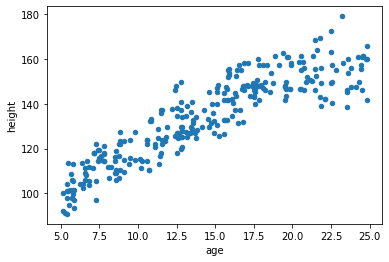

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
howell_5_25 = pd.read_csv("data/howell_5_25.csv")
howell_5_25.plot.scatter(x="age", y = "height")


Załóżmy, że istnieje zalezność pomiędzy wiekiem, a wzrostem. Mówiąc dokładniej załózmy, że istnieje  pewna **nieznana deterministyczna (nielosowa)** funckcja $f$ taka, że:

$$
wzrost = f(wiek) + \epsilon.
$$
W tym miejscu należy zadać 2 pytania. Po pierwsze czym jest $\epsilon$ i po drugie, czy nie może on zostać wykluczony z naszego równania? 

$\epsilon$ okreslany jest często zwyczajnie mianem **błędu losowego**, jednakże warto zastanowić się skąd bierze się ten błąd? Wyobraźmy sobie, że udzielamy kredytu na podstawie pewnych predyktorów będących danymi o kliencie: zarobki, wydatki, stan cywilny, liczba dzieci itd. itp. Czy majac 2 klientów banku starających się o kredyt, posiadających identyczne wartości tych zmiennych jesteśmy pewni, że ich spłata (bądź brak spłaty) kredytu bedzie identyczny? Odpowiedź brzmi nie, poza informacjami zgromadzownymi przez bank istnieje jeszcze wiele różnych innych zmiennych (np. to czy dana osoba jest hazardzistą, wypadki itp.), które mogą wpłynąć na wynik. Z tego też powodu o $\epsilon$ warto myśleć jako o **niewiedzy o pewnych zjawiskach, które nie zostały ujęte w naszych danych** zamiast jako o sztucznym błędzie losowym. 

Wróćmy jednak do naszego zadania. Założyliśmy pewną relację pomiędzy wielkiem dziecka a jego wzrostem. Czy jesteśmy w stanie odnaleźć tę relację, czyli znaleźć funkcję $f$? Nie do końca, $f$ może być dowolną funkcją. W tym miejscu zamiast szukać dowolnej funkcji, dodamy kilka dodatkowych założeń na jej temat tworząc pewien **model statystyczny**. W praktyce oznacza to, ze zamiast szukać funckji $f$ szukać będziemy funkcji $\hat{f}$ zakładając, że:

$$
wzrost ≈ \hat{f}(wiek)
$$

Model statystyczny oznacza pewne **uproszczenie rzeczywistości**, w którym funkcja $\hat{f}$ reprezentuje $f$ w pewien **"optymalny"** sposób. Wrócimy jeszcze do tego co oznacza optymalna reprezentacja.

Jednym z najprostszych modeli statystycznych jest model **regresji liniowej**,  w którym zakładamy, że $\hat{f}$ jest funkcją liniową naszych predyktorów. W naszym przypadku:

$$
wzrost ≈ \hat{\beta_0} + \hat{\beta_1} wiek, 
$$

gdzie $\hat{\beta_0}$ i $\hat{\beta_1}$ sa pewnymi stałymi, które będziemy chcieli **wyestymować**.

Oczywiście nasuwa nam się pytanie jak wybrać parametry $\beta_0$ i $\beta_1$ aby nasze rozwiązanie było **optymalne**. Aby je wybrać musimy sobie najpierw odpowiedzieć na pytanie co oznacza optymalność naszego rozwiązania? Oczywistym jest to iż chcemy, aby nasze **predykcje** były jak najlepsze - najbliższe prawdziwym wartościom wieku. Potrzebna jest nam jednak metoda mierzenia optymalności.

W ogólnym przypadku po wybraniu modelu statystycznego wybieramy tak zwaną **funkcję straty**, której wartości bedziemy chcieli **mimimalizować**. W przypadku regresji liniowej standardowym wyborem jest **błąd kwadratowy** - suma kwadratów różnić pomiędzy prawdziwymi wartościami (wzrostu), a predykcjami z modelu. Szukamy więc $\beta_0$ i $\beta_1$, które zminimalizują błąd kwadratowy. Jest to tak zwana **Metoda najmnieszych kwadratów**.

$$
SE(\hat{\beta_0}, \hat{\beta_1}) = [wzrost - (\hat{\beta_0} + \hat{\beta_1} wiek)]^T[wzrost - (\hat{\beta_0} + \hat{\beta_1} wiek)]
$$

lub w ogólnym przypadku:

$$
SE(\hat{\hat{\beta}}) = [y - \hat{\beta} X]^T[y - \hat{\beta} X]
$$
gdzie $\hat{\beta} = (\hat{\beta_0}, \hat{\beta_1}, ..., \hat{\beta_p})$ jest wektorem estymowanych parametrów, $y$ oznacza wektor realizacji zmiennej objasnianem, a $X = (1, X_1, X_2, ..., X_p)$ jest realizacją predyktorów.

Jak jednak dobrać $\beta_0$ i $\beta_1$ aby błąd był najmniejszy? Matematyczne rozwiązanie tego problemu dane jest wzorem:

$$
\frac{\partial SE}{\partial \hat{\beta}} [y - \hat{\beta} X]^T[y - \hat{\beta} X] = 0\\
\frac{\partial SE}{\partial \hat{\beta}} [y^Ty - 2(\hat{\beta}X)^Ty + (\hat{\beta}X)^T(\hat{\beta}X)] = 0\\
-2X^Ty + 2X^TX\hat{\beta}= 0\\
\hat{\beta} = (X^TX)^{-1}X^Ty
$$

In [15]:
X = np.expand_dims(howell_5_25.age, -1)
X_ = np.hstack((np.ones((X.shape[0], 1)), X))
y = howell_5_25.height

beta = np.linalg.inv(X_.T.dot(X_)).dot(X_.T).dot(y)

print(beta)

[89.93956233  3.04491934]


w Python współczynniki regresji liniowej możemy policzyc z użyciem:

In [16]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y)

print('Intercept:', reg.intercept_)
print('Coefficients:', reg.coef_)

Intercept: 89.93956232833004
Coefficients: [3.04491934]


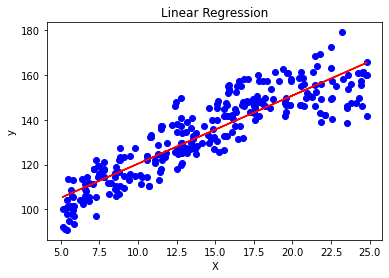

In [17]:
plt.scatter(X, y, color='blue')
plt.plot(X, reg.predict(X), color='red')
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

Wartosci $\beta_0$ i $\beta_1$, które tutaj otrzymaliśmy są optymalne dla błędu kwadratowego, można by się zastanowić co by było gdybyśmy wybrali inną funkcję straty np. **błąd absolutny** - suma różnic wartości bezwzględnych pomiędzy prawdziwymi wartościami (wzrostu), a predykcjami z modelu. Błąd absolutny jest lepszym wybrem gdy mamy do czynienia z wartościami odstającymi, ale o tym później...

## Metoda największej wiarygodności

Metoda najmniejszych kwadratów jest bardzo prosta do zrozumienia, jednkże jej minusem jest to, że nie nie ma ona głębszych założeń np o rozkładach, przez co nie jesteśmy w stanie powiedziec o naszym modelu nic więcej. Jedną z rzeczy, które mogłbyby nas interesować to czy wyliczone współczynniki $\hat{\beta_0}$ i $\hat{\beta_1}$ są statystycznie istotone (są niezerowe) lub czy cały model jest (czy faktycznie istnieje liniowa zależność).

przejdziemy teraz do **metody największej wiarygodności**, która towarzyszyć nam będzie w trakcie poznawania kolejnych modeli. Zanim zastosujemy ją do regresji liniowej, zacznijmy od prosszego modelu, w którym chcemy ustalić jakie jest prawdopodobieństwo wyrzucenia orła przy rzucie monetą (być może fałszywą). 

Zacznijmy od wygenerowania przykładowych rzutów monet:

In [22]:
# Wygenerowanie losowych danych z rozkładu Bernoulliego
np.random.seed(123)
p_true = 0.6  # prawdopodobieństwo sukcesu
data = np.random.binomial(n=1, p=p_true, size=20)
data

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1])

Metoda największej wiarygodności działa następująco:

1. Na samym początku musimy znaleźć **funkcję wiarygodności**. Aby tego dokonać musimy znać rozkład z jakiego pochodzą nasze dane (albo go założyć!). W ogólnym przypadku do czynienia bedziemy mieli z rodziną rozkładów parametryzowaną wektorem parametrów $\theta$. Funkcja wiarygodności definiowana jest jako:

$$
\mathscr{L_n}(\theta|x) = \prod_{i=1}^n f(x_i|\theta)
$$
gdzie $f(.|\theta)$ jest funkcją gęstości lub masy prawdopodobienstwa.

W naszym przypadku dane do wyniki rzutu monetą, gdzie możemy otrzymać tylko orła lub reszkę. Jest to więć [rozkład Bernulliego](https://pl.wikipedia.org/wiki/Rozk%C5%82ad_zero-jedynkowy). Prawdopodobienstwo wyrzucenia orła wynosi $p$, a reszki $1 - p$, a nieznane prawdopodobieństwo $p$ jest jedynym paraetrem optymalizowanym w naszym modelu tj: $\theta = p$. Funkcja wiarygodności będzie równa:

$$
p^k (1 - p)^{N - k}
$$
gdzie $k$ to liczba orłów, a $N$ to liczba rzutów. W naszym konkretnym przypadku:

$$
p^3 (1 - p)^{20 - 3}
$$

2. Maksymalizujemy funkcje wiarygodności ze względu na szukany parametr $\theta$:

$$
\hat{\theta} = argmax_{\theta \in \Theta}\hat{\mathscr{L_n}}(\theta|x)
$$

Rozwiazanie znajdujemy najczęściej rozwiązując równanie wiarygodności:

$$
\frac{\partial \hat{\mathscr{L_n}}(\theta|x)}{\partial \theta} = 0
$$


Estymator MLE: 0.7000003717371276


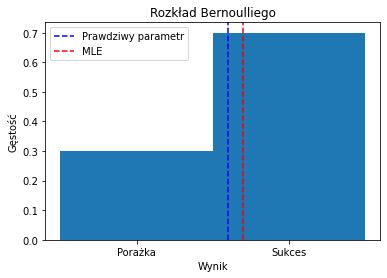

In [24]:
# Definicja funkcji -log-wiarygodności dla rozkładu Bernoulliego
def bernoulli_neg_loglik(theta, y):
    return -np.sum(y * np.log(theta) + (1 - y) * np.log(1 - theta))

# Maksymalizacja funkcji log-wiarygodności w celu oszacowania parametru
result = minimize_scalar(bernoulli_neg_loglik, args=(data,), bounds=[0, 1], method='bounded')
p_mle = result.x
print("Estymator MLE:", p_mle)

# Wykres MLE i prawdziwego parametru
fig, ax = plt.subplots()
ax.hist(data, bins=[0, 1, 2], align='left', density=True)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Porażka', 'Sukces'])
ax.set_xlabel('Wynik')
ax.set_ylabel('Gęstość')
ax.set_title('Rozkład Bernoulliego')
ax.axvline(p_true, color='blue', linestyle='--', label='Prawdziwy parametr')
ax.axvline(p_mle, color='red', linestyle='--', label='MLE')
ax.legend()
plt.show()


No dobrze, ale jak to się ma do regresji liniowej (i pokrewnych modeli)? 

W modelu regresji liniowej zakładamy, że **warunkowa wartość oczekiwana** (uogólniając średnia) $y|X$ (wzrost pod warunkiem wieku) pochodzi z rozkładu normalnego o średniej zaleznej liniowo od predyktorów (wieku w naszym przypadku):

$$
y|X \sim N(\mu, \sigma^2)\\
\mu = \beta X
$$

gdzie zakładamy stałą wartość $\sigma$.

Jak dokładnie rozumieć tę zależność? Myślmy o tym w ten sposób: Jeśli mam ustaloną wartość wieku dziecka np. 18 miesięcy to wzrost dzieci w wieku 18 miesięcy pochodzi z rozkładu normalnego o sredniej $\beta_0 + beta_1  18$ ($beta_0$ i $beta_1$ estymujemy metodą największej wiarygodności).

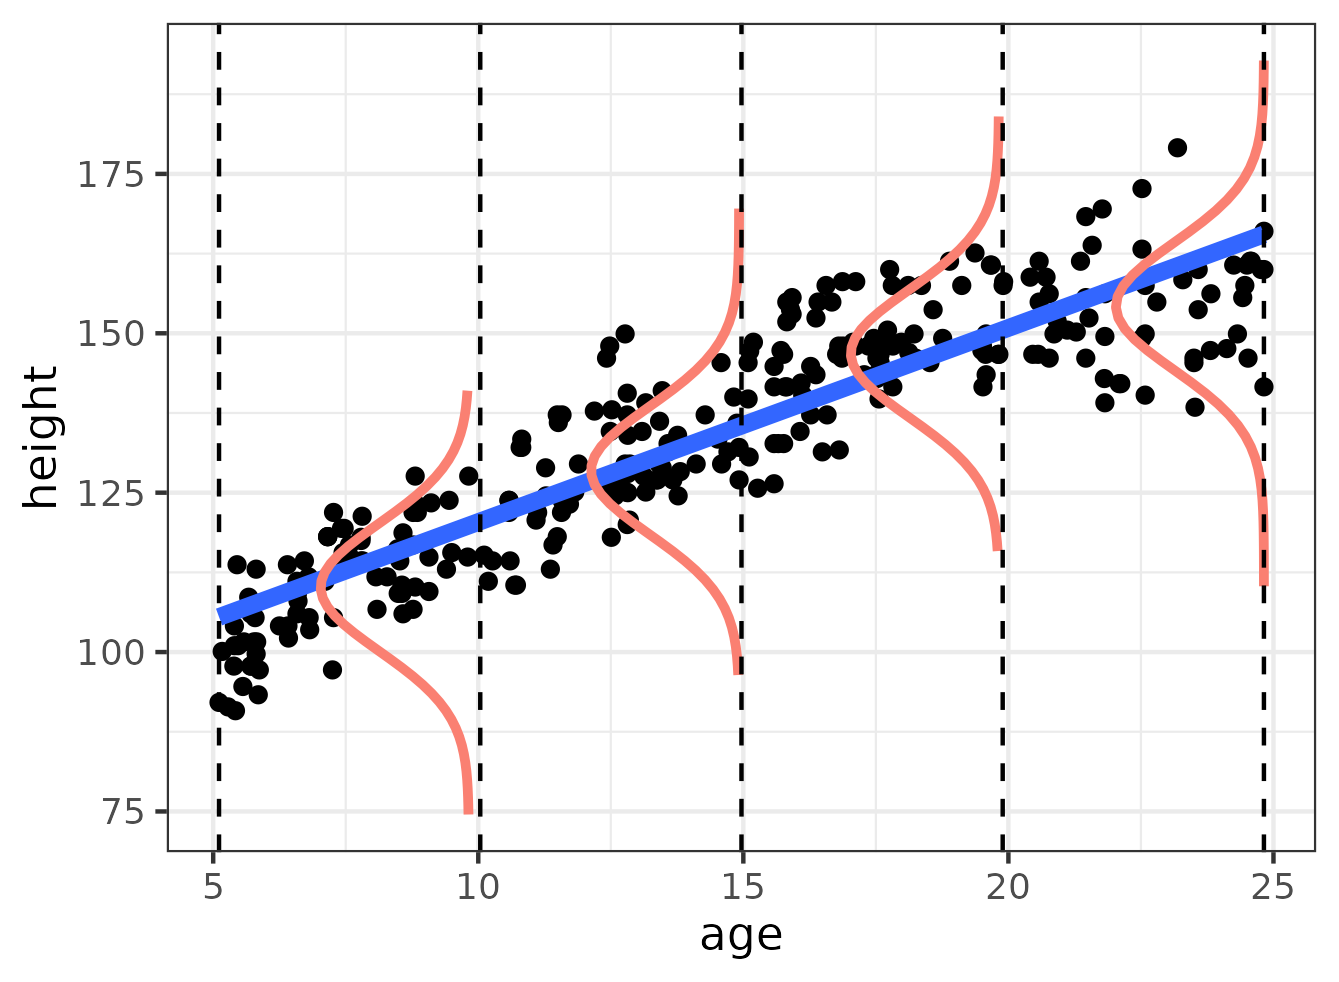

Funkcja największej wiarygodności dla regresji liniowej dana jest wzorem:

$$
\mathscr{L}(\beta, \sigma \mid y)=\frac{1}{\left(2 \pi \sigma^{2}\right)^{n / 2}} \exp ^{-\left(\frac{1}{2 \sigma^{2}}(Y-X \beta)^{T}(Y-X \beta)\right)}
$$
Bardzo często zamiast maksymalizować funkcję wiarygodności możemy maksymalizować jej logarytm (**log-likelihood**) ponieważ jest to prostsza funkcja (z własności logarytmu wiemy że maksymalizacja obu jest równowazna)

$$
\ell(\beta, \sigma \mid y)=-\frac{n}{2}\left(\ln (2 \pi)+\ln \left(\sigma^{2}\right)\right)-\frac{(Y-X \beta)^{T}(Y-X \beta)}{2 \sigma^{2}}=-\frac{n}{2}\left(\ln (2 \pi)+\ln \left(\sigma^{2}\right)\right)-\frac{R S S(\beta)}{2 \sigma^{2}}
$$

Okazuje się, że w przypadku regresji liniowej log-likelihood jest "przesuniętym" błędem kwadratowym co oznacza, że **minimalizacja błądu kwadratowego jest równoważna maksymalizacji log-likelihood** - z obu metod mamy ten sam wynik.

$$
\ell(\beta, \sigma \mid y)=\frac{R S S(\beta)}{\alpha_1} + \alpha_2
$$

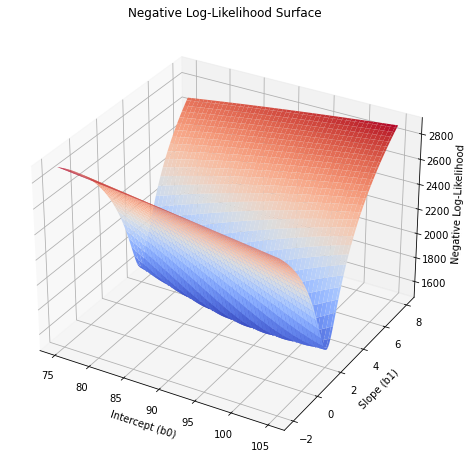

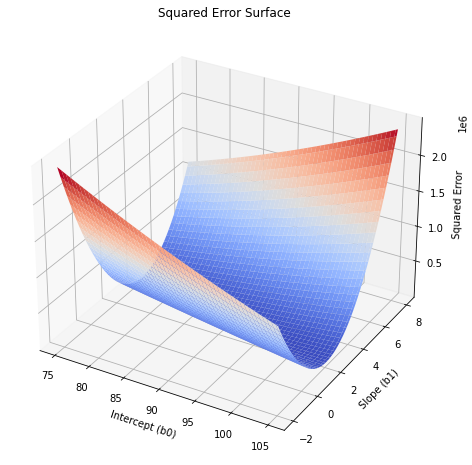

In [40]:
from mpl_toolkits.mplot3d import Axes3D

x = howell_5_25.age
y = howell_5_25.height

# Define the parameter grids for the negative log-likelihood and squared error
b0_range = np.linspace(75, 105, 100)
b1_range = np.linspace(-2, 8, 100)
b0_grid, b1_grid = np.meshgrid(b0_range, b1_range)

# Compute negative log-likelihood and Squared Error
nll_grid = np.zeros_like(b0_grid)
for i in range(len(b0_range)):
    for j in range(len(b1_range)):
        residuals = y - (b0_range[i] + b1_range[j]*x)
        sse = np.sum(residuals**2)
        se_grid[j,i] = sse
        nll_grid[j,i] = 0.5*len(x)*(np.log(2*np.pi) + np.log((sse/len(x))**2)) + sse/(2*(sse/len(x))**2)

# Plot the negative log-likelihood
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(b0_grid, b1_grid, nll_grid, cmap='coolwarm')
ax.set_xlabel('Intercept (b0)')
ax.set_ylabel('Slope (b1)')
ax.set_zlabel('Negative Log-Likelihood')
ax.set_title('Negative Log-Likelihood Surface')
plt.show()

# Plot the squared error
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(b0_grid, b1_grid, se_grid, cmap='coolwarm')
ax.set_xlabel('Intercept (b0)')
ax.set_ylabel('Slope (b1)')
ax.set_zlabel('Squared Error')
ax.set_title('Squared Error Surface')
plt.show()


czyli:

$$
\hat{\beta} = (X^TX)^{-1}X^Ty\\
\hat{\sigma} = \frac{(Y-X \beta)^{T}(Y-X \beta)}{n}
$$

Otrzymujemy ten sam wynik, jednakże mamy teraz założenia o rozkładzie, co daje nam duże możliwości:

Jak interpretowac wyniki tego podsumowania:

1. Współczynniki (Coefficients):

 - $\beta_0$ (Intercept) - Jeśli wszystkie predyktory mają wartość $0$ to wartość zmiennej objasnianej bedzie równa $\beta_0$. Jednakże wartość ta nie powinna być zawsze tłumaczona (uzasadniana) ponieważ w wielu przypadkach nie ma to sensu. W naszym przykładzie (jesli się uprzeć i tłumaczyć) byłby to średni wzrost dziecka mierzony od razu po narodzinach.
 
 - $\beta_1, ..., \beta_p$ - Mówią o ile wzrośnie/zmaleje wartośc zmiennej objasnianej jeśli wartość predyktora wzrośnie/zmaleje. w naszym przykładzie jesli dziecko zestarzeje się o $1$ miesiąc to jego wzrost bedzie (średnio) wiekszy o $1 * 0.6350$ cm.

 - przy każdym współczynniku widnieje wartość statystyki $t$ oraz **p-value**. Dzięki założeniom normalności regresji liniowej znamy rozkład współczynników i możemy użyc t-testu by sprawdzić czy wartość współczynnika jest niezerowa (to znaczy zmienna jest istotna).
 
 $$
 \hat{\beta} \sim N(\beta, (X^TX)^{-1}\sigma^2)
 $$

In [44]:
from scipy.stats import norm

y_hat = reg.predict(X)
residuals = y - y_hat
mse = np.sum(residuals ** 2) / (X.shape[0] - X.shape[1] - 1)
covariance_matrix = mse * np.linalg.inv(X.T @ X)
standard_errors = np.sqrt(np.diag(covariance_matrix))

# Perform the z-test
z_values = reg.coef_ / standard_errors
p_values = 2 * (1 - norm.cdf(abs(z_values)))

# Print the z-test results
print("Z-values: ", z_values)
print("P-values: ", p_values)

Z-values:  [96.57416419]
P-values:  [0.]


2. Multiple R-squared i Adjusted R-squared:

 - Obie są metrykami dopasowania modelu. Wachają się od 0 do 1. Im blizej 1 tym lepsze dopasowanie modelu. Mierzą procent wariancji danych wyjaśnianą przez model. Adjusted R-squared bierze poprawkę na ilość predyktorów w modelu. Duże różnice między tymi współczynnikami moga wskazywać na przedopasowanie (overfitting) modelu.
 
$$
R^2 = 1 - \frac{(y-\hat{y})^T(y-\hat{y})}{(y-\bar{y})^T(y-\bar{y})}\\
Adjusted R^2 = 1 - \frac{(y-\hat{y})^T(y-\hat{y})(n-1)}{(y-\bar{y})^T(y-\bar{y})(n-(k+1))}
$$

In [46]:
from sklearn.metrics import r2_score

r2 = r2_score(y, y_hat)

# calculate the adjusted R-squared value
n = X.shape[0]
k = X.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1)) / (n - k - 1)

print("R-squared:", r2)
print("Adjusted R-squared:", adj_r2)

R-squared: 0.8098461479660113
Adjusted R-squared: 0.8091881761596653


3. F-statistic:

 - Ten test bada czy model jako całość jest istotny, a dokładniej czy dopasowanie naszego modelu jest statystycznie lepsze od dopasowania modelu bez predyktorów (dopasowanie zwykłą srednią ze zmiennej objaśnianej). Hipotera zerowa mówi, że nie jest. Możemy myślec o tym tescie jako o teście odpowiedniego doboru modelu (jeśli nasz model nie jest lepszy od zwykłej sredniej to może założenia o liniowości nie są poprawne w tym przypadku).
 
Statystyka F dla testowania istotności modelu regresji liniowej może być wyrażona jako:

$$ F = \frac{(RSS_0 - RSS_1)/(p_1-p_0)}{RSS_1/(n-p_1-1)} $$

gdzie:

 - $RSS_0$ to suma kwadratów reszt dla modelu zerowego (tj. modelu z tylko jednym terminem dla przecięcia).
 - $RSS_1$ to suma kwadratów reszt dla pełnego modelu (tj. modelu ze wszystkimi zmiennymi objaśniającymi).
 - $p_0$ to liczba parametrów w modelu zerowym (tj. 1 dla terminu przecięcia).
 - $p_1$ to liczba parametrów w pełnym modelu (tj. liczba zmiennych objaśniających plus 1 dla terminu przecięcia).
 - $n$ to wielkość próby.

Statystyka F ma rozkład F z $p_1-p_0$ stopniami swobody w liczniku i $n-p_1-1$ stopniami swobody w mianowniku.

In [47]:
from sklearn.feature_selection import f_regression

f_statistic, p_value = f_regression(X, y)

print("F-statistic:", f_statistic[0])
print("p-value:", p_value[0])

F-statistic: 1230.8219594749028
p-value: 3.5257815185265324e-106
